In [2]:
train_file = "train_data.csv"
test_file = "test_data.csv"
sample_submission = "sample_submission.csv"
import pandas as pd
import numpy as np

In [4]:
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [16]:
columns = list(train_data)
ycolumns = [c for c in columns if c.startswith('X')]
xcolumns = [c for c in columns if not c.startswith('X')]

In [9]:
#pd.read_csv(sample_submission)

In [19]:
train_data[ycolumns].sum(1).describe() # 18 чисел в интервале от 0 до 1, в сумме не дают 1 

count    1676.000000
mean        8.827051
std         1.325852
min         4.484360
25%         7.939615
50%         8.753630
75%         9.660220
max        14.926793
dtype: float64

In [21]:
train_data.head() 
# если по-хорошему, то надо учитывать бренд, модель и комплектацию, 
# но в простом варианте будем смотреть только на бренд и особенности человека

,Brand,Model,Complectation,C,P1,P2,P3,P4,P5,P6,...,X10,X11,X12,X13,X14,X15,X16,X17,X18,Photo_filename
0,Toyota,Highlander,Toyota Highlander New 3.5 Elegance,2,3,3,3,3,2,1,...,0.506242,0.646070,0.496397,0.482742,0.519546,0.363006,0.541016,0.478539,0.482166,photos/Toyota/Highlander-elegance-070.png
1,BMW,5 Series Sedan,BMW 5 Series Sedan 540i xDrive,2,2,2,2,4,1,1,...,0.691734,0.418310,0.644495,0.341387,0.525428,0.840987,0.627297,0.405951,0.649367,photos/BMW/5_540i-xDrive_P0300(FZBTQ).jpg
2,Hyundai,Santa Fe Premium,Hyundai Santa Fe Premium Comfort 2.4 AT,1,1,2,1,2,1,1,...,0.918261,0.532597,0.575651,0.493465,0.495388,0.307278,0.473211,0.838744,0.867956,photos/Hyundai/Hyundai-SANTA FE-32-80.png
3,BMW,5 Series Sedan,BMW 5 Series Sedan 520i,2,3,3,3,3,1,1,...,0.635884,0.414786,0.353809,0.322471,0.446515,0.785099,0.679779,0.753667,0.306496,photos/BMW/5_520i_P0300(FLCEW).jpg
4,Volvo,XC90,Volvo XC90 T6 AT 5S Momentum,1,1,3,2,3,1,2,...,0.843366,0.126928,0.380268,0.148491,0.333521,0.245096,0.165287,0.856968,0.506990,photos/Volvo/XC90_R-Design_614(RC00)_9qDsh.jpg


In [25]:
xlabels = xcolumns[3:-1]

In [28]:
train_data[xlabels].head()

,C,P1,P2,P3,P4,P5,P6,P7
0,2,3,3,3,3,2,1,50
1,2,2,2,2,4,1,1,30
2,1,1,2,1,2,1,1,54
3,2,3,3,3,3,1,1,33
4,1,1,3,2,3,1,2,43


In [29]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain, xtest, idtrain, idtest = train_test_split(
    train_data, np.arange(train_data.shape[0]), stratify=train_data["Brand"], test_size=0.1)

In [52]:
brand, counts = np.unique(train_data["Brand"], return_counts=True)
brand2, counts2 = np.unique(test_data["Brand"], return_counts=True)
import matplotlib.pyplot as plt
import seaborn as sns

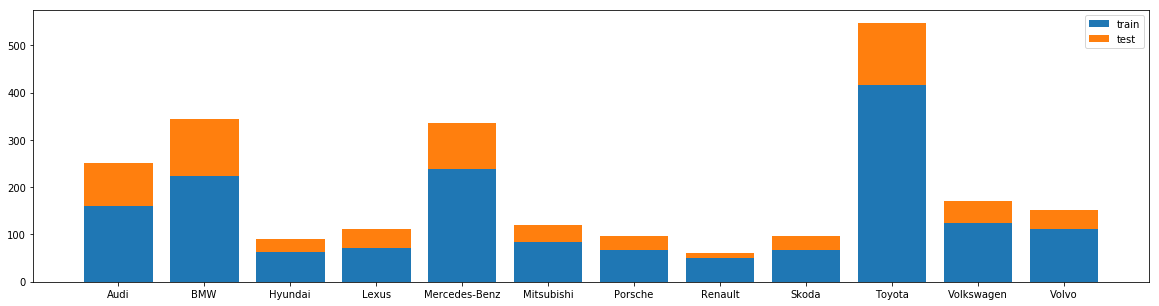

In [57]:
plt.figure(figsize=(20,5))
plt.bar(brand, counts, label="train")
plt.bar(brand2, counts2, bottom=counts, label="test")
plt.legend()
plt.show()

In [58]:
xlabels

['C', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7']

In [146]:
for c in xlabels:
    print(c, sorted(train_data[c].unique()))

C [1, 2]
P1 [1, 2, 3, 4, 5]
P2 [1, 2, 3, 4, 5]
P3 [1, 2, 3, 4, 5]
P4 [1, 2, 3, 4, 5]
P5 [1, 2, 3, 4, 5]
P6 [1, 2]
P7 [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


In [181]:
train_data["Brand"] = pd.Categorical(train_data["Brand"])
test_data["Brand"] = pd.Categorical(test_data["Brand"])
train_data["Model"] = pd.Categorical(train_data["Model"])
test_data["Model"] = pd.Categorical(test_data["Model"])

In [183]:
mean = train_data["P7"].mean()
std = train_data["P7"].std()

def prepare_data(df):
    return pd.concat([
        df[xlabels[:-1]],
        df["Brand"],
        df["Model"],
        df["P7"].apply(lambda x: (x-mean)/std)
    ], axis=1)
    pass

xtrain_prepared = prepare_data(xtrain)
xtest_prepared = prepare_data(xtest)
train_prepared = prepare_data(train_data)
test_prep = prepare_data(test_data)

In [184]:
import catboost
from catboost import CatBoostClassifier, CatBoostRegressor
train_prepared

,C,P1,P2,P3,P4,P5,P6,Brand,Model,P7
0,2,3,3,3,3,2,1,Toyota,Highlander,1.023877
1,2,2,2,2,4,1,1,BMW,5 Series Sedan,-1.442374
2,1,1,2,1,2,1,1,Hyundai,Santa Fe Premium,1.517127
3,2,3,3,3,3,1,1,BMW,5 Series Sedan,-1.072436
4,1,1,3,2,3,1,2,Volvo,XC90,0.160689
5,1,5,5,5,2,3,1,Volkswagen,Jetta,0.530626
6,2,2,2,3,3,4,1,Mitsubishi,Pajero Sport,-1.195749
7,1,4,2,4,4,3,2,Lexus,NX,-1.319062
8,2,2,2,2,4,3,2,Toyota,Land Cruiser 200,-0.825811
9,1,4,4,1,1,1,1,Skoda,Rapid,1.023877


In [185]:
test_classifiers = {}
classifiers = {}
for i in ycolumns:
    cb = CatBoostRegressor()
    cb.fit(xtrain_prepared, xtrain[i], cat_features=[0, 1,2,3,4,5,6,7,8])
    test_classifiers[i] = cb
    cb = CatBoostRegressor()
    cb.fit(train_prepared, train_data[i], cat_features=[1,2,3,4,5,6, 7, 8])
    classifiers[i] = cb

In [186]:
predictions = {}
mae = 0
for i in ycolumns:
    predictions[i] = test_classifiers[i].predict(xtest_prepared)#[:, 1]
    mae += (sum(abs(predictions[i] - xtest[i])))
mae/ (len(ycolumns)*xtest.shape[0])

0.1524541673803646

In [187]:
predictions_ = {}
#mae = 0
for i in ycolumns:
    predictions_[i] = classifiers[i].predict(test_prep)#[:, 1]
    #mae += (sum(abs(predictions[i] - xtest[i])))
#mae/ (len(ycolumns)*xtest.shape[0])

In [188]:
train_data.index

RangeIndex(start=0, stop=1676, step=1)

In [189]:
with open("attempt2.csv", 'w') as f:
    f.write("ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18\n")
    for i, x in enumerate(test_data["ID"].values):
        row = [str(x)]
        for c in "X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18".split(','):
            row.append(str(predictions_[c][i]))
        f.write(",".join(row)+"\n")

In [122]:
with open(sample_submission) as g:
    print(g.readline())

ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18

